<a href="https://colab.research.google.com/github/nadiayerko/Data/blob/main/Yerkovich_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Produccion de soja argentina des 1941.csv to Produccion de soja argentina des 1941 (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12303 entries, 0 to 12302
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cultivo_nombre           12303 non-null  object 
 1   anio                     12303 non-null  int64  
 2   campania                 12303 non-null  object 
 3   provincia_nombre         12303 non-null  object 
 4   provincia_id             12303 non-null  int64  
 5   departamento_nombre      12303 non-null  object 
 6   departamento_id          12254 non-null  float64
 7   superficie_sembrada_ha   12303 non-null  int64  
 8   superficie_cosechada_ha  12303 non-null  int64  
 9   produccion_tm            12303 non-null  int64  
 10  rendimiento_kgxha        12303 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 1.0+ MB


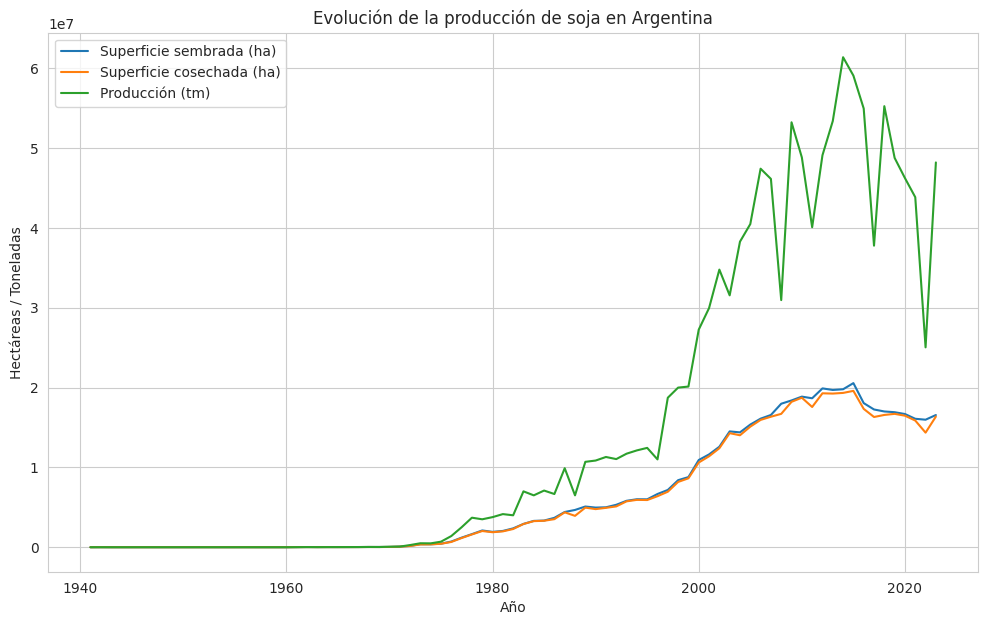

<ipython-input-1-69cc745a556e>:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prov_agg.values, y=prov_agg.index, palette='viridis')


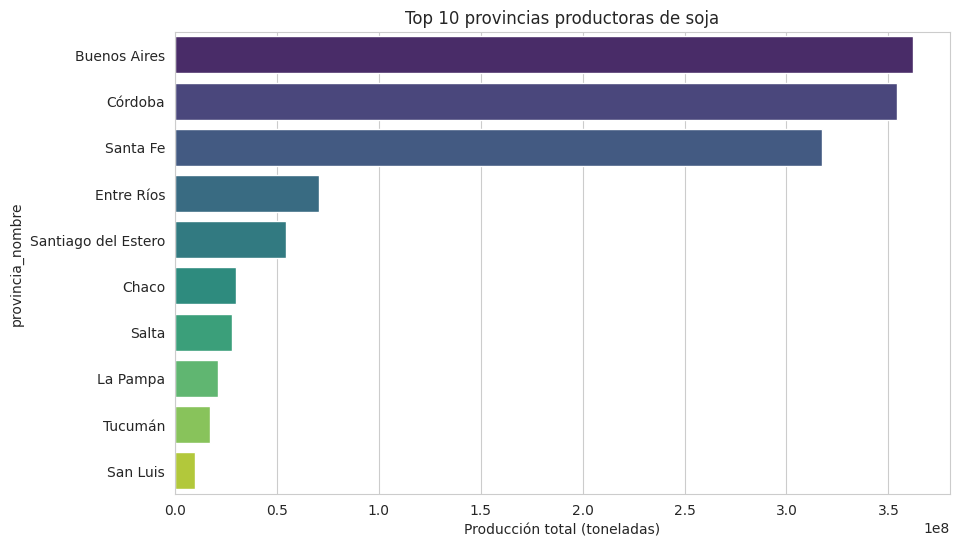

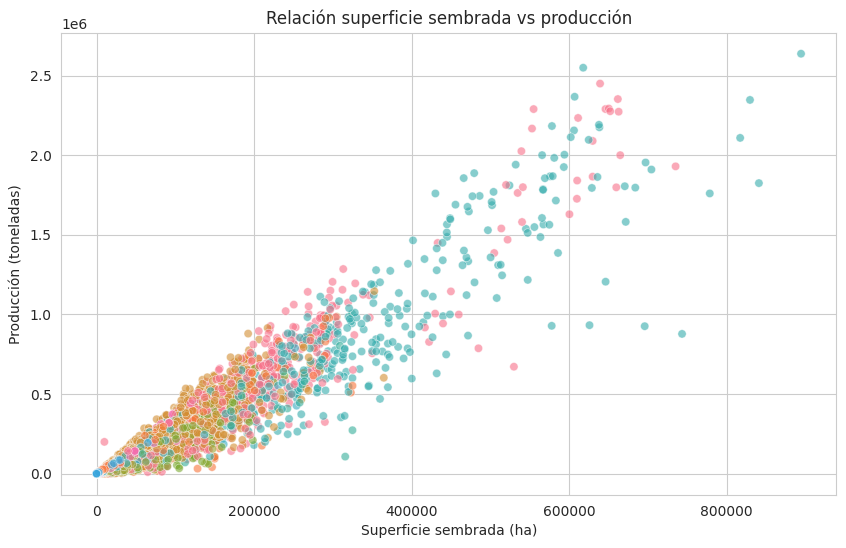

'\n- La producción de soja ha crecido consistentemente en las últimas décadas en Argentina.\n- Las provincias de la región pampeana son las principales responsables de esta producción.\n- Existe una fuerte correlación entre superficie sembrada y producción.\n- Los valores faltantes en el dataset son mínimos o inexistentes, permitiendo un análisis confiable.\n'

In [1]:
# 🌱 Proyecto Data Science - Primera Entrega
## Producción de Soja en Argentina
# Curso: Data Science - CoderHouse

# 1. Cargar datos

from google.colab import files
uploaded = files.upload()

import pandas as pd

# Leer el archivo subido
for file_name in uploaded.keys():
    df = pd.read_csv(file_name, encoding='latin-1')

# Normalizar nombres de columnas
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Mostrar primeras filas
df.head()

# 2. Abstract

"""
En este proyecto analizamos la evolución de la producción de soja en Argentina desde 1941 hasta la actualidad, utilizando datos detallados por provincia y departamento. A través de un análisis exploratorio de datos (EDA), buscamos comprender patrones de crecimiento, variabilidad en los rendimientos y distribución geográfica de la producción.

Se generan visualizaciones univariadas, bivariadas y multivariadas para responder preguntas de interés como:
- ¿Cómo ha evolucionado la superficie sembrada, cosechada y la producción a lo largo del tiempo?
- ¿Qué provincias presentan los mayores rendimientos?
- ¿Existe alguna tendencia de aumento o disminución en el rendimiento promedio nacional?

La información obtenida permitirá caracterizar el desarrollo agrícola de la soja en el país y detectar posibles áreas de mejora o inversión futura.
"""

# 3. Preguntas e hipótesis

"""
Preguntas de interés:
- ¿Ha aumentado la producción de soja en Argentina en los últimos años?
- ¿Qué provincias presentan mejores rendimientos de soja?
- ¿Existe una relación fuerte entre la superficie sembrada y la producción total?
- ¿Qué provincias tienen mayor superficie destinada a soja?

Hipótesis:
- H1: La producción de soja en Argentina ha aumentado significativamente en los últimos 20 años.
- H2: Las provincias de la región pampeana tienen rendimientos superiores a las demás.
- H3: Existe una correlación positiva fuerte entre la superficie sembrada y la producción.
"""

# 4. Exploración inicial

df.info()

df.describe()

# Verificar valores faltantes
df.isnull().sum()

# 5. Visualizaciones

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# 5.1 Evolución de superficie sembrada, cosechada y producción

df_agg = df.groupby('anio').agg({
    'superficie_sembrada_ha':'sum',
    'superficie_cosechada_ha':'sum',
    'produccion_tm':'sum'
}).reset_index()

plt.figure(figsize=(12,7))
plt.plot(df_agg['anio'], df_agg['superficie_sembrada_ha'], label='Superficie sembrada (ha)')
plt.plot(df_agg['anio'], df_agg['superficie_cosechada_ha'], label='Superficie cosechada (ha)')
plt.plot(df_agg['anio'], df_agg['produccion_tm'], label='Producción (tm)')
plt.xlabel('Año')
plt.ylabel('Hectáreas / Toneladas')
plt.title('Evolución de la producción de soja en Argentina')
plt.legend()
plt.show()

# 5.2 Provincias con mayor producción total

prov_agg = df.groupby('provincia_nombre')['produccion_tm'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=prov_agg.values, y=prov_agg.index, palette='viridis')
plt.xlabel('Producción total (toneladas)')
plt.title('Top 10 provincias productoras de soja')
plt.show()

# 5.3 Relación entre superficie sembrada y producción

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='superficie_sembrada_ha', y='produccion_tm', hue='provincia_nombre', alpha=0.6, legend=False)
plt.xlabel('Superficie sembrada (ha)')
plt.ylabel('Producción (toneladas)')
plt.title('Relación superficie sembrada vs producción')
plt.show()

# 6. Diagnóstico de valores perdidos

df.isnull().mean()*100

# 7. Conclusiones parciales

"""
- La producción de soja ha crecido consistentemente en las últimas décadas en Argentina.
- Las provincias de la región pampeana son las principales responsables de esta producción.
- Existe una fuerte correlación entre superficie sembrada y producción.
- Los valores faltantes en el dataset son mínimos o inexistentes, permitiendo un análisis confiable.
"""
